In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
# Load the training dataset
df = pd.read_csv('/kaggle/input/tcp-ip-ddos-udp/TCP_IP-DDoS-UDP1_train.pcap.csv')

# Load the testing dataset
df_test = pd.read_csv('/kaggle/input/tcp-ip-ddos-udp/TCP_IP-DDoS-UDP1_test.pcap.csv')

In [128]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,1267.0,17.0,64.0,230960.275963,230960.275963,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,1.016359e+08,9.5,10.0,0.0,0.0,0.0,141.55
1,2364.5,17.0,64.0,450601.451726,450601.451726,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
2,3330.0,17.0,64.0,389166.275558,389166.275558,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
3,2252.0,17.0,64.0,16341.385411,16341.385411,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
4,4933.0,17.0,64.0,19927.246769,19927.246769,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55


In [129]:
df.shape

(206170, 45)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206170 entries, 0 to 206169
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    206170 non-null  float64
 1   Protocol Type    206170 non-null  float64
 2   Duration         206170 non-null  float64
 3   Rate             206170 non-null  float64
 4   Srate            206170 non-null  float64
 5   Drate            206170 non-null  float64
 6   fin_flag_number  206170 non-null  float64
 7   syn_flag_number  206170 non-null  float64
 8   rst_flag_number  206170 non-null  float64
 9   psh_flag_number  206170 non-null  float64
 10  ack_flag_number  206170 non-null  float64
 11  ece_flag_number  206170 non-null  float64
 12  cwr_flag_number  206170 non-null  float64
 13  ack_count        206170 non-null  float64
 14  syn_count        206170 non-null  float64
 15  fin_count        206170 non-null  float64
 16  rst_count        206170 non-null  floa

In [131]:
df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,206170.000000,206170.000000,206170.000000,2.061700e+05,2.061700e+05,206170.0,206170.000000,206170.000000,2.061700e+05,206170.000000,...,206170.000000,206170.000000,206170.000000,2.061700e+05,206170.000000,206170.000000,206170.000000,206170.000000,206170.000000,206170.000000
mean,24736.444819,16.960670,64.401280,3.315114e+04,3.315114e+04,0.0,0.000002,0.000002,7.275549e-07,0.000187,...,50.505237,0.405005,50.502008,8.469252e+07,9.499423,10.022601,0.571519,191.161232,0.008449,141.534581
std,9157.797949,0.217455,2.214703,5.116397e+04,5.116397e+04,0.0,0.000143,0.000128,1.056190e-04,0.004175,...,11.608964,6.648823,11.252023,9.890516e+05,0.038958,0.414518,9.392879,4061.848920,0.044665,0.878438
min,323.140000,5.670000,58.880000,1.975310e+00,1.975310e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,49.292514,0.000000,49.520000,0.000000e+00,1.000000,9.927540,0.000000,0.000000,0.000000,1.000000
25%,18331.000000,17.000000,64.000000,1.814142e+04,1.814142e+04,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,50.000000,0.000000,50.000000,8.469659e+07,9.500000,10.000000,0.000000,0.000000,0.000000,141.550000
50%,24713.000000,17.000000,64.000000,2.033509e+04,2.033509e+04,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,50.000000,0.000000,50.000000,8.469659e+07,9.500000,10.000000,0.000000,0.000000,0.000000,141.550000
75%,31079.375000,17.000000,64.000000,2.459069e+04,2.459069e+04,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,50.000000,0.000000,50.000000,8.469660e+07,9.500000,10.000000,0.000000,0.000000,0.000000,141.550000
max,300348.050000,17.000000,124.930000,1.050541e+06,1.050541e+06,0.0,0.020000,0.020000,2.000000e-02,0.580000,...,918.472727,358.993729,886.880000,1.016359e+08,9.743590,36.982880,508.102627,241272.432141,0.950000,141.550000


In [132]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight'],
      dtype='object')

In [133]:
df.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
dtype: int64

In [134]:
df.nunique()

Header_Length       67392
Protocol Type         149
Duration              227
Rate               206170
Srate              206170
Drate                   1
fin_flag_number         3
syn_flag_number         3
rst_flag_number         3
psh_flag_number        30
ack_flag_number        55
ece_flag_number         1
cwr_flag_number         1
ack_count               9
syn_count              25
fin_count               7
rst_count            1145
HTTP                    3
HTTPS                  51
DNS                    38
Telnet                  1
SMTP                    1
SSH                     1
IRC                     1
TCP                    56
UDP                    58
DHCP                    1
ARP                    10
ICMP                   23
IGMP                    1
IPv                    10
LLC                    10
Tot sum              1693
Min                   226
Max                  1110
AVG                  3301
Std                  3290
Tot size              582
IAT         

In [135]:
# List of columns with only one unique value
columns_to_drop = ['Drate', 'ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 
                   'SSH', 'IRC', 'DHCP', 'IGMP']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Verify the changes
df.shape

(206170, 36)

In [136]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,1267.0,17.0,64.0,230960.275963,230960.275963,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,1.016359e+08,9.5,10.0,0.0,0.0,0.0,141.55
1,2364.5,17.0,64.0,450601.451726,450601.451726,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
2,3330.0,17.0,64.0,389166.275558,389166.275558,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
3,2252.0,17.0,64.0,16341.385411,16341.385411,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55
4,4933.0,17.0,64.0,19927.246769,19927.246769,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,50.0,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55


In [137]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [138]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
# Count the number of instances in each cluster
cluster_counts = df['Cluster'].value_counts()

# Identify the cluster with the fewest instances
anomaly_cluster = cluster_counts.idxmin()

# Flag anomalies
df['Anomaly'] = df['Cluster'] == anomaly_cluster


In [140]:
# Identify the cluster with the most instances
majority_cluster = cluster_counts.idxmax()

# Create the new 'Target' column
df['Target'] = df['Cluster'].apply(lambda x: 'Normal' if x == majority_cluster else 'Anomaly')

In [141]:
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [142]:
df['Target'].nunique()

2

In [143]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Cluster,Anomaly,Target
0,1267.0,17.0,64.0,230960.275963,230960.275963,0.0,0.0,0.0,0.0,0.0,...,1.016359e+08,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
1,2364.5,17.0,64.0,450601.451726,450601.451726,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
2,3330.0,17.0,64.0,389166.275558,389166.275558,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
3,2252.0,17.0,64.0,16341.385411,16341.385411,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1
4,4933.0,17.0,64.0,19927.246769,19927.246769,0.0,0.0,0.0,0.0,0.0,...,8.469660e+07,9.5,10.0,0.0,0.0,0.0,141.55,0,False,1


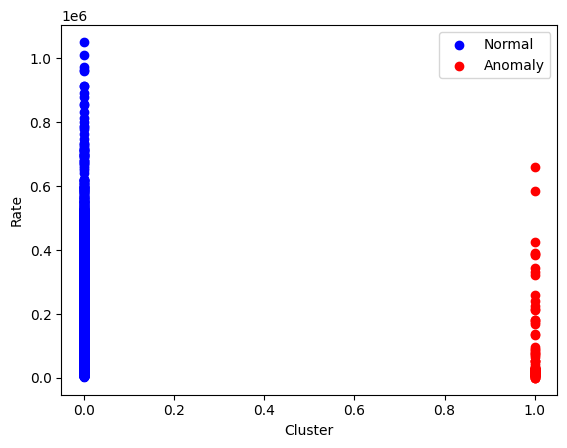

In [144]:
# Plotting the clusters
plt.scatter(df[df['Anomaly'] == False]['Cluster'], df[df['Anomaly'] == False]['Rate'], color='blue', label='Normal')
plt.scatter(df[df['Anomaly'] == True]['Cluster'], df[df['Anomaly'] == True]['Rate'], color='red', label='Anomaly')
plt.xlabel('Cluster')
plt.ylabel('Rate')
plt.legend()
plt.show()


In [145]:
# List of redundant columns
columns_to_drop = ['Anomaly','Cluster']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [146]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'TCP', 'UDP', 'ARP',
       'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance',
       'Weight', 'Target'],
      dtype='object')

## Correlation with the target column

In [147]:
correlation_matrix = df.corr()['Target']

# Display the correlation of each column with the 'Target' column
print(correlation_matrix)

Header_Length     -0.114899
Protocol Type      0.403346
Duration          -0.033426
Rate              -0.003865
Srate             -0.003865
fin_flag_number   -0.017015
syn_flag_number   -0.019028
rst_flag_number   -0.035289
psh_flag_number   -0.121796
ack_flag_number   -0.587528
ack_count         -0.010124
syn_count         -0.126846
fin_count         -0.036981
rst_count         -0.569271
HTTP               0.000140
HTTPS             -0.673670
DNS                0.000220
TCP               -0.587471
UDP                0.473844
ARP               -0.044980
ICMP              -0.020327
IPv                0.044980
LLC                0.044980
Tot sum           -0.854096
Min               -0.667378
Max               -0.836852
AVG               -0.853564
Std               -0.803345
Tot size          -0.845459
IAT               -0.001060
Number             0.002073
Magnitue          -0.868069
Radius            -0.802172
Covariance        -0.813945
Variance          -0.223896
Weight             0

## Mutual information with the target column

In [148]:
# Assuming 'df' is your DataFrame and 'Target' is the column you've created
X = df.drop('Target', axis=1) # Features
y = df['Target'] # Target variable

mi = mutual_info_regression(X, y)
mi /= np.max(mi) # Normalize the mutual information values

mi_series = pd.Series(mi)
mi_series.index = X.columns
mi_series.sort_values(ascending=False)

print(mi_series)

Header_Length      0.312600
Protocol Type      0.420022
Duration           0.072727
Rate               0.043550
Srate              0.043442
fin_flag_number    0.000000
syn_flag_number    0.174034
rst_flag_number    0.114616
psh_flag_number    0.041092
ack_flag_number    0.769193
ack_count          0.000000
syn_count          0.165629
fin_count          0.000000
rst_count          0.508499
HTTP               0.000000
HTTPS              0.632096
DNS                0.000000
TCP                0.603533
UDP                0.714740
ARP                0.080936
ICMP               0.000000
IPv                0.125829
LLC                0.000000
Tot sum            0.643951
Min                0.446531
Max                0.505079
AVG                1.000000
Std                0.582931
Tot size           0.660983
IAT                0.350477
Number             0.000000
Magnitue           0.745525
Radius             0.682001
Covariance         0.717315
Variance           0.359766
Weight             0

In [149]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'TCP', 'UDP', 'ARP',
       'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance',
       'Weight', 'Target'],
      dtype='object')

## Feature Engineering

### Perform binning on selected numerical features

In [150]:
# Select features based on high mutual information scores and significant correlations
selected_features = ['Protocol Type', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 
                     'rst_count', 'HTTPS', 'TCP', 'UDP', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 
                     'Magnitue', 'Radius', 'Covariance']

# Perform binning on selected numerical features
binning_features = ['Min', 'Max', 'AVG', 'Std', 'Tot size', 'Magnitue', 'Radius', 'Covariance']
for feature in binning_features:
    # Define the number of bins for each feature
    num_bins = 5  # You can adjust the number of bins based on your data distribution
    # Apply KBinsDiscretizer
    kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
    df[feature+'_binned'] = kbins.fit_transform(df[[feature]])


### Create interaction features

In [151]:
interaction_features = ['ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count']

# Create PolynomialFeatures object
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the interaction features
interactions = poly.fit_transform(df[interaction_features])

# Generate feature names
feature_names = poly.get_feature_names_out(interaction_features)

# Create a DataFrame with the interaction features and their names
interaction_df = pd.DataFrame(interactions, columns=feature_names)

# Concatenate the original DataFrame with the interaction features DataFrame
df = pd.concat([df, interaction_df], axis=1)


In [152]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'selected_features', 'binning_features', and 'interaction_df.columns' are already defined
scaling_features = selected_features + binning_features + list(interaction_df.columns)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected and engineered features
df[scaling_features] = scaler.fit_transform(df[scaling_features])

# Now, you can use the engineered and scaled features along with the original features for modeling
X = df[scaling_features]
y = df['Target']


### Creating and testing the model based on metrics

In [153]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the input data for LSTM (assuming X_train and X_test are 2D arrays)
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the Bi-LSTM model architecture
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [154]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1933/1933 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 1.3051e-04
Test Loss: 5.8379886468173936e-05, Test Accuracy: 0.999967634677887


1933/1933 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       101
           1       1.00      1.00      1.00     61750

    accuracy                           1.00     61851
   macro avg       1.00      0.99      0.99     61851
weighted avg       1.00      1.00      1.00     61851

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       101
           1       1.00      1.00      1.00     61750

    accuracy                           1.00     61851
   macro avg       1.00      0.99      0.99     61851
weighted avg       1.00      1.00      1.00     61851



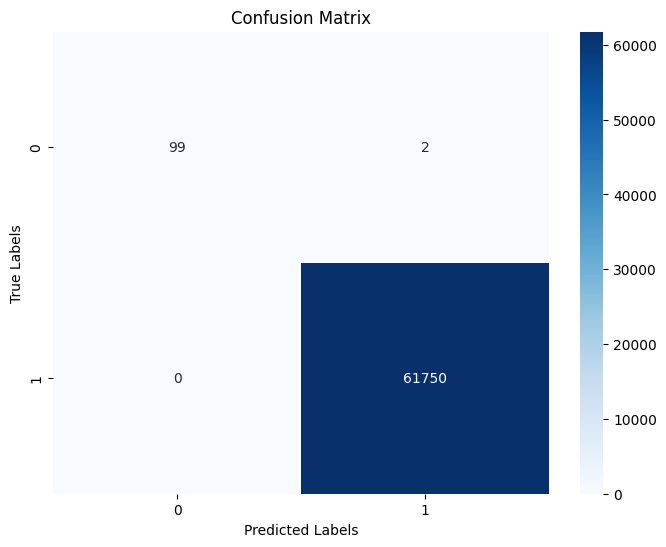

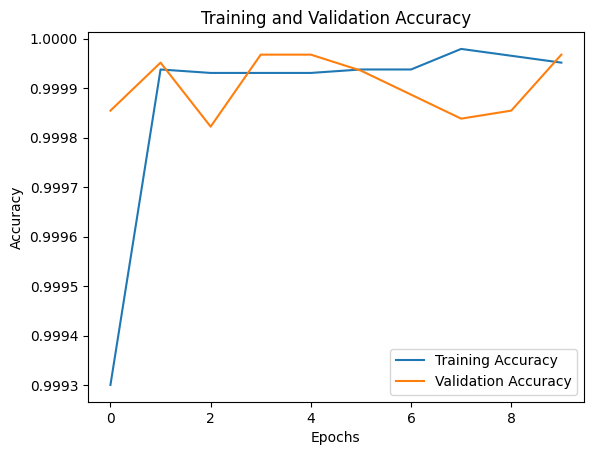

In [163]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Threshold the probabilities to get the predicted labels
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate additional evaluation metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


# Calculate additional evaluation metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


1933/1933 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


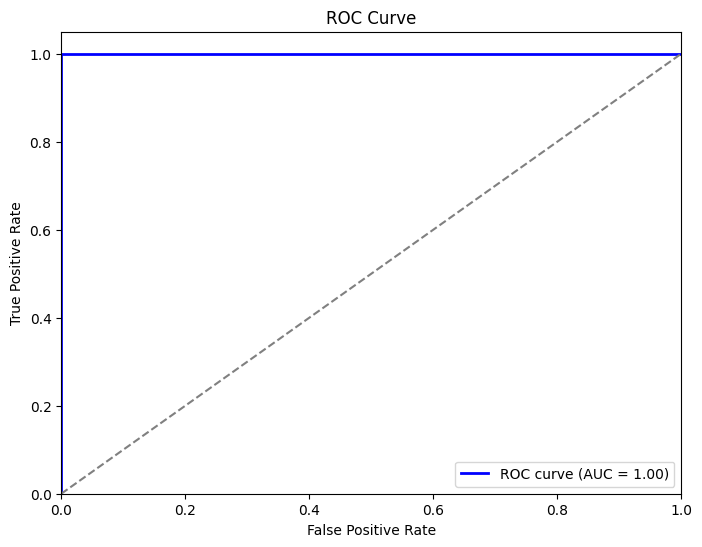

In [164]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Manual Calculation of the F1-score and Recall

In [166]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Calculate Recall
recall = TP / (TP + FN)
print(f"Recall: {recall}")

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {f1_score}")


Recall: 1.0
F1-Score: 0.9999838059302684


### Using functions from sklearn

In [167]:
from sklearn.metrics import f1_score, recall_score

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


F1-Score: 0.9999838059302684
Recall: 1.0


# Testing model on seperate set of Testing data

In [168]:
df_test.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
dtype: int64

In [169]:
# List of columns with only one unique value
columns_to_drop = ['Drate', 'ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 
                   'SSH', 'IRC', 'DHCP', 'IGMP']

# Drop the columns from the DataFrame
df_test = df_test.drop(columns=columns_to_drop)

# Verify the changes
df_test.shape

(205654, 36)

In [170]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test)

In [171]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
df_test['Cluster'] = kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [172]:
# Count the number of instances in each cluster
cluster_counts = df_test['Cluster'].value_counts()

# Identify the cluster with the fewest instances
anomaly_cluster = cluster_counts.idxmin()

# Flag anomalies
df_test['Anomaly'] = df_test['Cluster'] == anomaly_cluster


In [173]:
# Identify the cluster with the most instances
majority_cluster = cluster_counts.idxmax()

# Create the new 'Target' column
df_test['Target'] = df_test['Cluster'].apply(lambda x: 'Normal' if x == majority_cluster else 'Anomaly')

In [174]:
le = LabelEncoder()
df_test['Target'] = le.fit_transform(df_test['Target'])

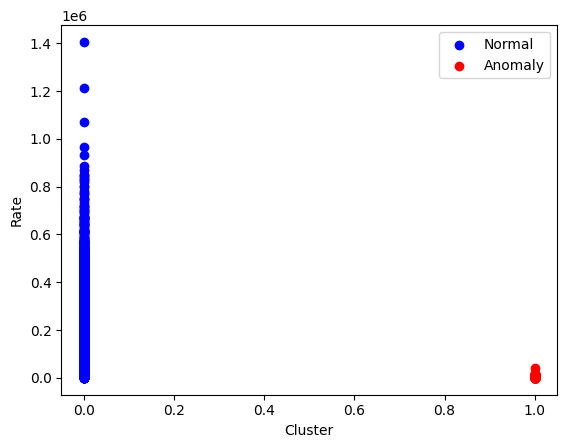

In [175]:
# Plotting the clusters
plt.scatter(df_test[df_test['Anomaly'] == False]['Cluster'], df_test[df_test['Anomaly'] == False]['Rate'], color='blue', label='Normal')
plt.scatter(df_test[df_test['Anomaly'] == True]['Cluster'], df_test[df_test['Anomaly'] == True]['Rate'], color='red', label='Anomaly')
plt.xlabel('Cluster')
plt.ylabel('Rate')
plt.legend()
plt.show()


In [176]:
# List of redundant columns
columns_to_drop = ['Anomaly','Cluster']

# Drop the columns from the DataFrame
df_test = df_test.drop(columns=columns_to_drop)

### Feature engineering

In [178]:
# Select features based on high mutual information scores and significant correlations
selected_features = ['Protocol Type', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 
                     'rst_count', 'HTTPS', 'TCP', 'UDP', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 
                     'Magnitue', 'Radius', 'Covariance']

# Perform binning on selected numerical features
binning_features = ['Min', 'Max', 'AVG', 'Std', 'Tot size', 'Magnitue', 'Radius', 'Covariance']
for feature in binning_features:
    # Define the number of bins for each feature
    num_bins = 5  # You can adjust the number of bins based on your data distribution
    # Apply KBinsDiscretizer
    kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
    df_test[feature+'_binned'] = kbins.fit_transform(df_test[[feature]])


In [179]:
interaction_features = ['ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count']

# Create PolynomialFeatures object
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the interaction features
interactions = poly.fit_transform(df_test[interaction_features])

# Generate feature names
feature_names = poly.get_feature_names_out(interaction_features)

# Create a DataFrame with the interaction features and their names
interaction_df = pd.DataFrame(interactions, columns=feature_names)

# Concatenate the original DataFrame with the interaction features DataFrame
df_test = pd.concat([df_test, interaction_df], axis=1)


In [185]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'selected_features', 'binning_features', and 'interaction_df.columns' are already defined
scaling_features = selected_features + binning_features + list(interaction_df.columns)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected and engineered features
df_test[scaling_features] = scaler.fit_transform(df_test[scaling_features])

# Now, you can use the engineered and scaled features along with the original features for modeling
X_separate_test = df_test[scaling_features]
y_separate_test = df_test['Target']


In [186]:
X_separate_test = X_separate_test.values.reshape(X_separate_test.shape[0], 1, X_separate_test.shape[1])

### Predicting with the trained model

In [191]:
# Predict with the trained model
y_pred_probs_separate = model.predict(X_separate_test)

# Threshold the probabilities to get the predicted labels
y_pred_separate = (y_pred_probs_separate > 0.5).astype(int)

6427/6427 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


Classification Report on Separate Test Data:
               precision    recall  f1-score   support

           0       0.31      1.00      0.47        89
           1       1.00      1.00      1.00    205565

    accuracy                           1.00    205654
   macro avg       0.65      1.00      0.73    205654
weighted avg       1.00      1.00      1.00    205654



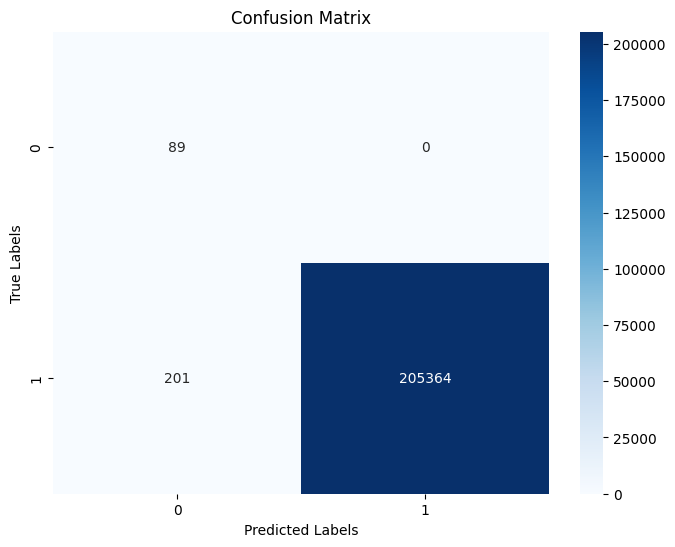

In [192]:
# Calculate additional evaluation metrics
report_separate = classification_report(y_separate_test, y_pred_separate)
print("Classification Report on Separate Test Data:\n", report_separate)

# Plot confusion matrix
cm = confusion_matrix(y_separate_test, y_pred_separate)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()